In [25]:
# Import all tools we need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, RocCurveDisplay 
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [26]:
# Load data into Pandas DataFrame
data = pd.read_csv("data/Telco-Customer-Churn.csv")
customer_churn_df = pd.DataFrame(data)

# Turn TotalCharges into numeric values to reveal NaN values
customer_churn_df["TotalCharges"] = pd.to_numeric(customer_churn_df["TotalCharges"], errors="coerce")
customer_churn_df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [27]:
customer_churn_df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [28]:
# Drop all NaN values from TotalCharges
customer_churn_df = customer_churn.dropna(subset=["TotalCharges"])

In [29]:
customer_churn_df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [56]:
# Remove customerID as IDs aren't useful for predictions
customer_churn_df = customer_churn_df.drop("customerID", axis=1)

In [57]:
customer_churn_df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [60]:
# Convert target column "Churn" to binary (Yes=1, No=0)
customer_churn_df["Churn"] = customer_churn_df["Churn"].map({"Yes": 1, "No": 0})
customer_churn_df["Churn"]

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7032, dtype: int64

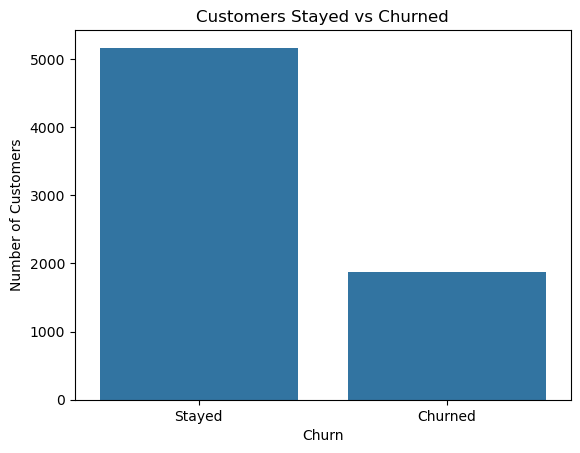

In [70]:
ax = sns.countplot(x="Churn", data=customer_churn_df)
ax.set_title("Customers Stayed vs Churned")
ax.set_ylabel("Number of Customers")
ax.set_xticks([0, 1], labels=(["Stayed", "Churned"]));

<Axes: xlabel='gender'>

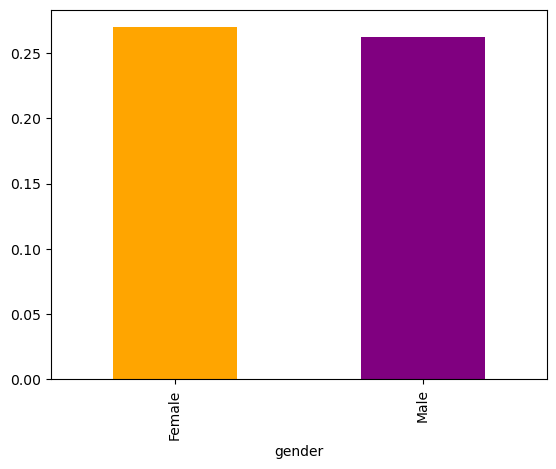

In [64]:
customer_churn_df.groupby("gender")["Churn"].mean().plot(kind="bar", color=["orange", "purple"])

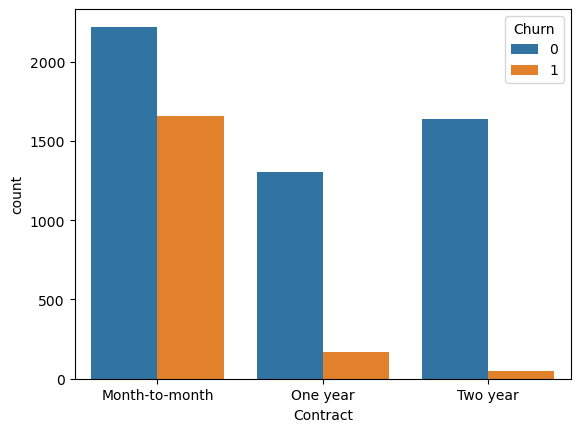

In [62]:
sns.countplot(x='Contract', data=customer_churn_df, hue='Churn');

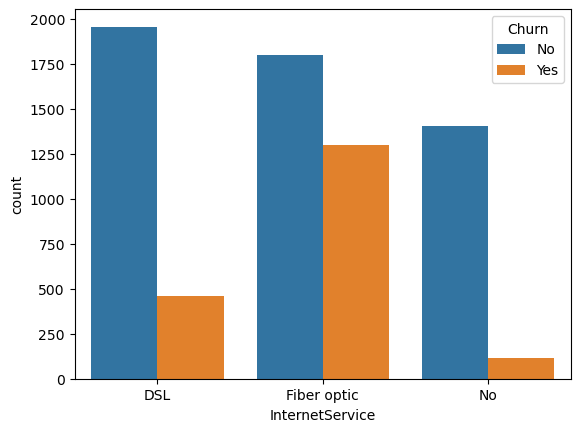

In [36]:
sns.countplot(x='InternetService', data=customer_churn_df, hue='Churn');

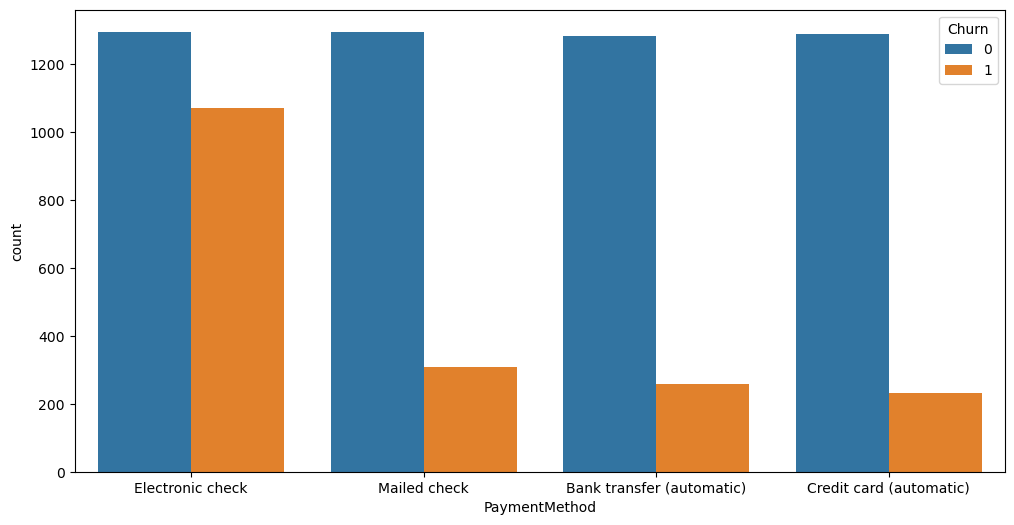

In [72]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='PaymentMethod', data=customer_churn_df, hue='Churn');

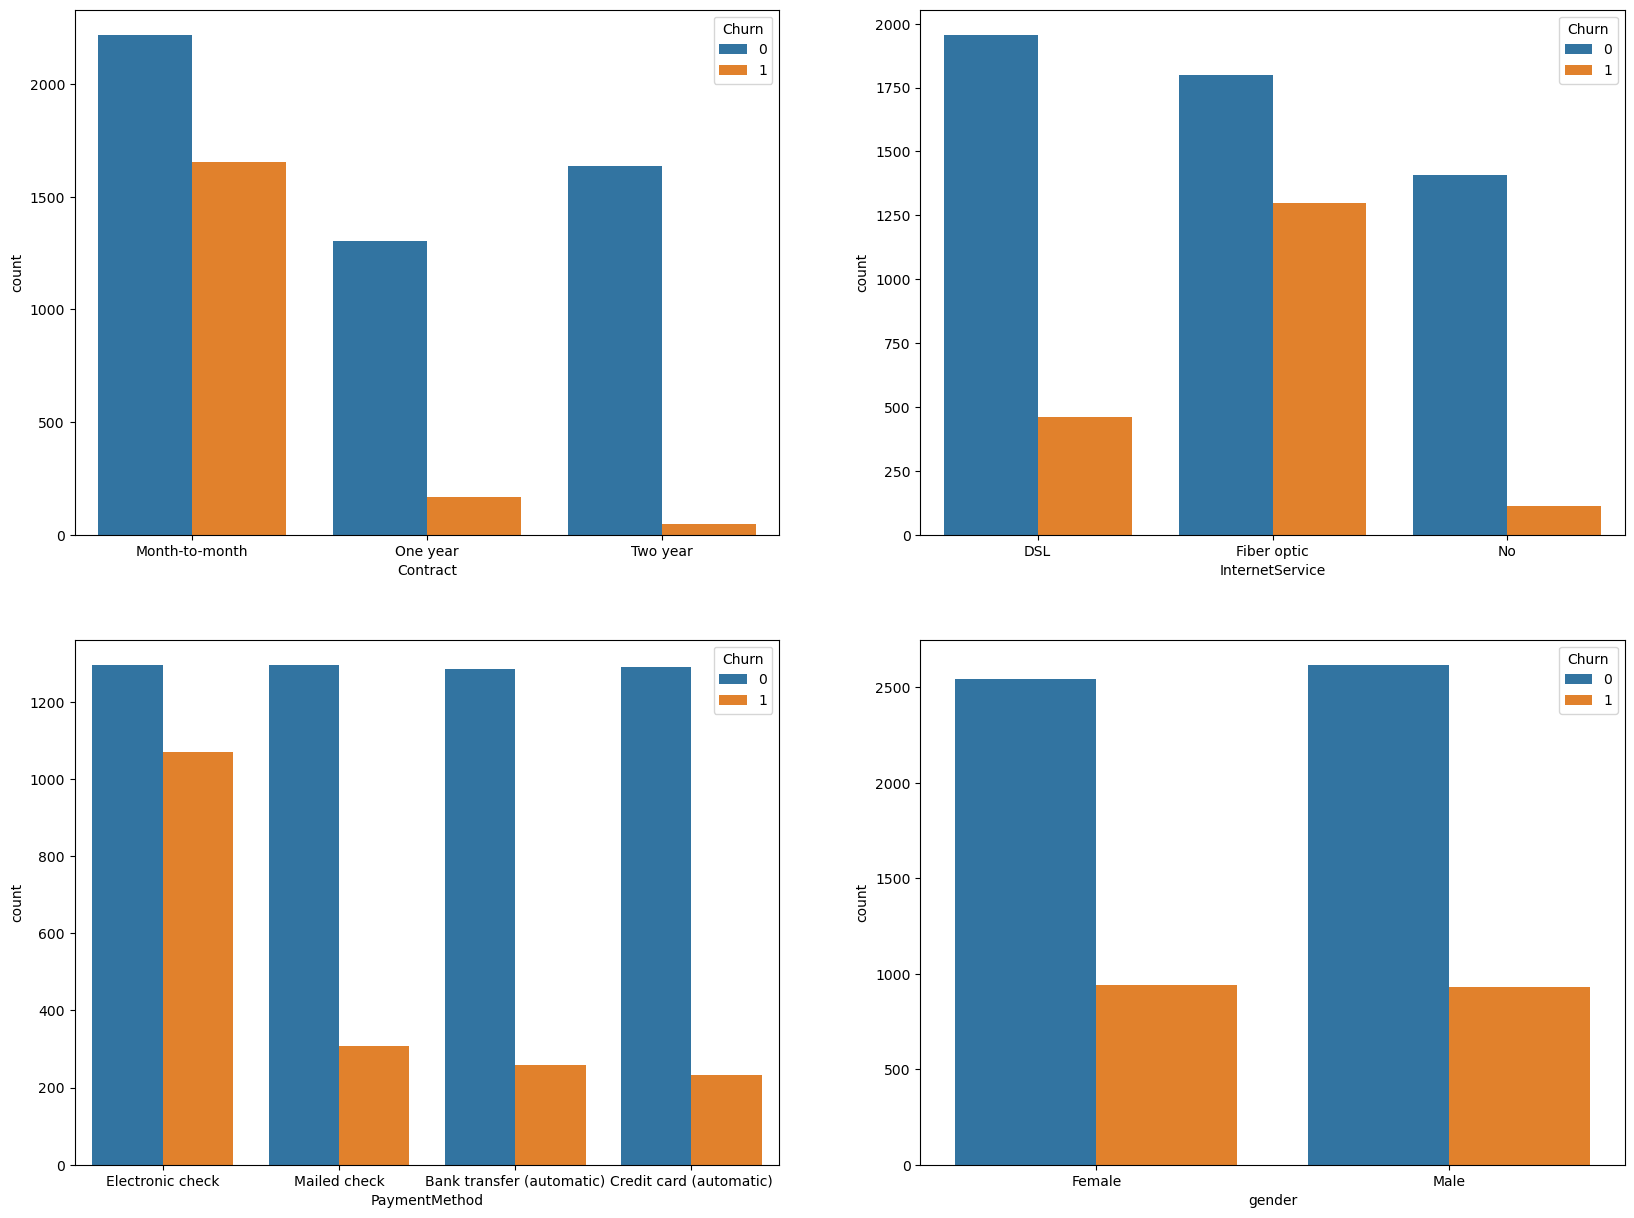

In [83]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 15))

sns.countplot(x='Contract', data=customer_churn_df, hue='Churn', ax=axes[0, 0])
sns.countplot(x='InternetService', data=customer_churn_df, hue='Churn', ax=axes[0, 1])
sns.countplot(x='PaymentMethod', data=customer_churn_df, hue='Churn', ax=axes[1, 0])
sns.countplot(x='gender', data=customer_churn_df, hue='Churn', ax=axes[1, 1]);

<Axes: xlabel='Churn', ylabel='MonthlyCharges'>

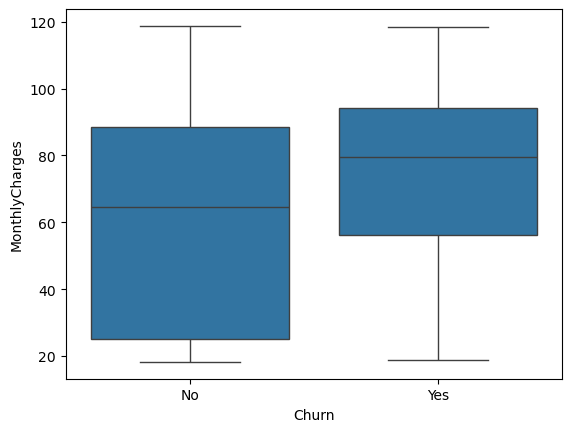

In [49]:
sns.boxplot(x="Churn", y="MonthlyCharges", data=customer_churn_df)

<Axes: xlabel='Churn', ylabel='tenure'>

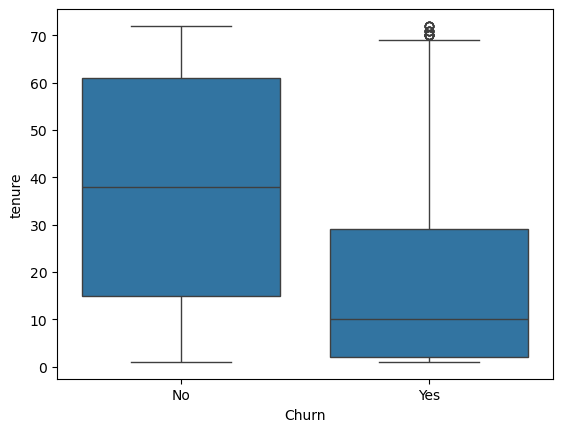

In [50]:
sns.boxplot(x="Churn", y="tenure", data=customer_churn_df)

<Axes: xlabel='Churn', ylabel='TotalCharges'>

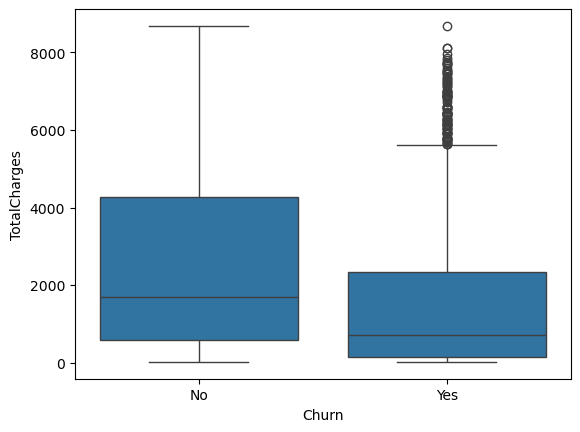

In [51]:
sns.boxplot(x="Churn", y="TotalCharges", data=customer_churn_df)